# Analysis of Eigenstate and eigenvector thought exact diagonalization

In [1]:
# My functions
from PhaseEstimation import hamiltonians as H
from PhaseEstimation import annni_model as ANNNI
from PhaseEstimation import general as qmlgen

# Plotting
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.graph_objects as go

# Others
import numpy as np 
import jax
import copy

/home/saverio/anaconda3/envs/annni/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


System studied:

$$H(L,K) = - J_1\Big( \underbrace{L \Sigma_i \sigma_z^i}_\text{magnetic field int.} + \overbrace{\Sigma_i \sigma_x^i\sigma_x^{i+1}}^\text{nearest neighbour int.} + \underbrace{K \Sigma_i \sigma_x^i\sigma_x^{i+2}}_\text{next nearest neighbour int.} \Big) \qquad\left[{J_1}\equiv 1, L:=\frac{h}{J_1}, K:= \frac{J_2}{J_1}, L\in[0,2], K = [0, -1]\right]$$

Note : In the code below $K$ (or $\kappa$) is always non-negative, the definition of it is opposite! 

In [2]:
N = 6
n_kappas  = 100
n_hs      = 100
kappa_max = 1
h_max     = 2

### Energy values
for: 
* $\kappa = [0,1]$
* $h = [0,2]$

### Show the first 3 energy levels in a 3D plot

In [3]:
side = 50
Hs = H.hamiltonian(ANNNI.build_Hs, N = 6, n_hs = side, n_kappas = side, kappa_max=kappa_max, ring = False)
E0, PSI0 = H.get_e_psi(Hs, 0)
E1, PSI1 = H.get_e_psi(Hs, 1)
E2, PSI2 = H.get_e_psi(Hs, 2)
E3, PSI3 = H.get_e_psi(Hs, 3)

x = np.linspace(0, 1, side)

fig = go.Figure(
    data=[
        # x and y needed to be swapped for it to properly show the graph
        go.Surface(opacity=0.5, colorscale="Blues", z=np.reshape(E0, (side,side)), x=x, y=x),
        go.Surface(opacity=0.5,   colorscale="Reds", z=np.reshape(E1, (side,side)), x=x, y=x),
        go.Surface(opacity=0.5,   colorscale="Greens", z=np.reshape(E2, (side,side)), x=x, y=x),
    ]
)

fig.update_layout(height=500)
fig.show()

 70%|███████   | 1762/2500 [00:35<00:15, 47.93it/s]

### Show the first 3 energy levels in a 2D plot

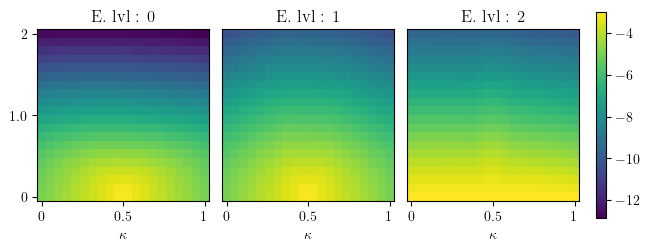

In [ ]:
ES = [E0,E1,E2]
immin, immax = np.min(ES), np.max(ES)
fig, axes = plt.subplots(nrows=1, ncols=3, constrained_layout=True)

for i, E in enumerate(ES):
    im = axes[i].imshow(np.rot90(np.reshape(E, (side,side))), cmap='viridis', vmin=immin, vmax=immax)
    axes[i].set_xlabel(r'$\kappa$')
    axes[i].set_xticks(ticks=[0,side/2-.5,side-1], labels=[0,kappa_max/2, kappa_max])
    axes[i].set_yticks([]); axes[i].set_title(f'E. lvl : {i}')

cm = fig.colorbar(im, fraction=0.06, pad=0.1)#, vmin=np.min(ES), vmax = np.max(ES))
cm.ax.set_ylim()
axes[0].set_yticks(ticks=[side-1,side/2-.5,0], labels=[0,h_max/2, h_max])


### Show the mass gaps
* $M10 = E_1(\kappa, h) - E_0(\kappa,h) $
* $M21 = E_2(\kappa, h) - E_1(\kappa,h) $

Scale = Uniform


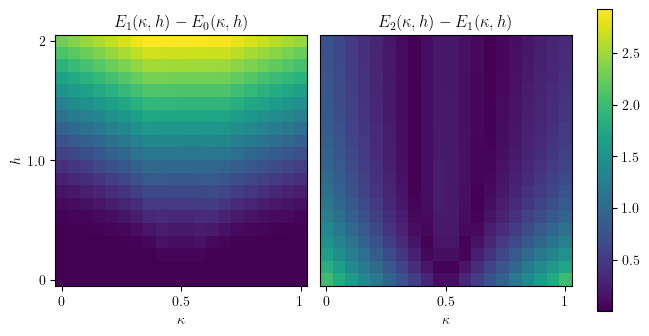

Scale = Log-normalized


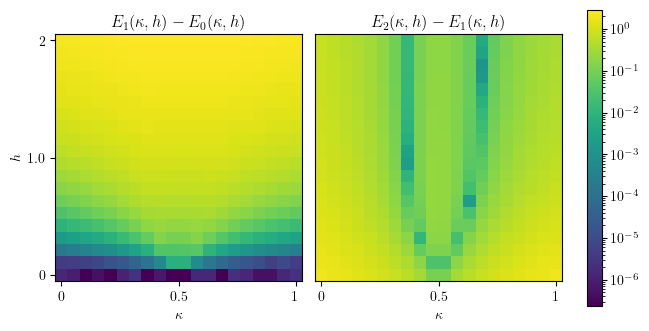

In [7]:
MS = np.array([E1-E0,E2-E1])
MS[MS == 0] = np.sort(np.unique(MS))[1]

mg_immin, mg_immax = np.min(MS), np.max(MS)
for scale in ['Uniform', 'Log-normalized']:
    print(f'Scale = {scale}')
    fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

    for i, M in enumerate(MS):
        if scale == 'Uniform':
            im = axes[i].imshow(np.rot90(np.reshape(M, (20,20))), cmap='viridis',norm=None, vmin=mg_immin, vmax=mg_immax)
        elif scale == 'Log-normalized':
            im = axes[i].imshow(np.rot90(np.reshape(M, (20,20))), cmap='viridis',norm=colors.LogNorm(vmin=mg_immin, vmax=mg_immax))

        axes[i].set_xlabel(r'$\kappa$')
        axes[i].set_xticks(ticks=[0,side/2-.5,side-1], labels=[0,kappa_max/2, kappa_max])
        axes[i].set_yticks([]); axes[i].set_title(rf'$E_{i+1}(\kappa,h)-E_{i}(\kappa,h)$')

    fig.colorbar(im,fraction=0.06, pad=0.1)
    axes[0].set_yticks(ticks=[side-1,side/2-.5,0], labels=[0,h_max/2, h_max])
    axes[0].set_ylabel(r'$h$')
    
    plt.show()

### h = 0 (No magnetic field)

In [8]:
Hs = H.hamiltonian(ANNNI.build_Hs, N = 6, n_hs = 1, n_kappas = n_kappas, kappa_max=kappa_max, ring = False)
E0, PSI0 = H.get_e_psi(Hs, 0)
E1, PSI1 = H.get_e_psi(Hs, 1)
E2, PSI2 = H.get_e_psi(Hs, 2)

100%|██████████| 100/100 [00:02<00:00, 49.40it/s]


In [9]:
np.shape(np.linspace(0,kappa_max, n_kappas))

(100,)

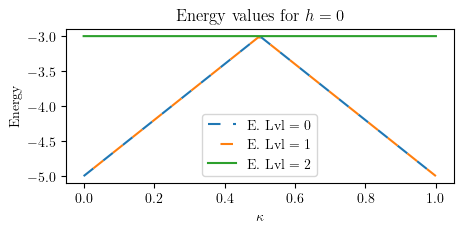

In [10]:
plt.figure(figsize=(5,2))
plt.plot(np.linspace(0,kappa_max, n_kappas), E0, label='E. Lvl = 0', ls=(0, (6, 6)))
plt.plot(np.linspace(0,kappa_max, n_kappas), E1, label='E. Lvl = 1', ls=(6, (6, 6)))
plt.plot(np.linspace(0,kappa_max, n_kappas), E2, label='E. Lvl = 2')
plt.xlabel(r'$\kappa$'); plt.ylabel('Energy'); plt.title(r'Energy values for $h=0$'); plt.legend(); plt.show()

### Getting the results from the email:

In [21]:
# "I have just done a quick check with 8 sites, exact diagonalization" 
N_value = 6

# "I fixed h = 0.5"
h_value = 0.5

# "I check for kappa = 0 ,  0.5 , 0.8 , 1.5"
kappas = np.linspace(0,2,201)

/home/saverio/anaconda3/envs/annni/lib/python3.8/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

divide by zero encountered in divide

/home/saverio/anaconda3/envs/annni/lib/python3.8/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

invalid value encountered in multiply



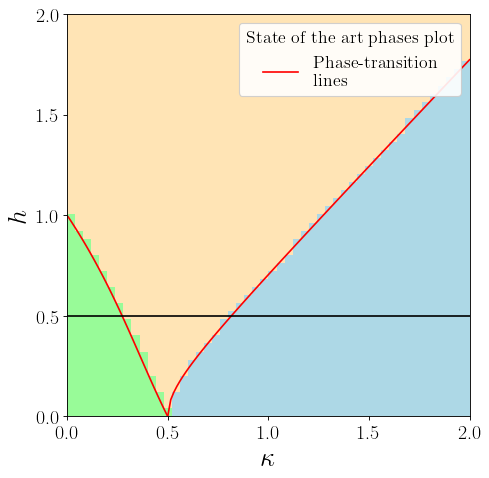

In [22]:
Hs = H.hamiltonian(ANNNI.build_Hs, N = 1, n_hs = 50, n_kappas = 50, kappa_max=2, ring = False)
Hs.show_phasesplot()
plt.axhline(.755*(50-1), color='black')

In [23]:
Hs = H.hamiltonian(ANNNI.build_Hs, N = N_value, n_hs = 2, n_kappas = 101, kappa_max=2, h_max = .5, ring = False)

In [24]:
kappas = Hs.model_params[1::2][:,2]
Hmats  = Hs.qml_Hs[1::2]

In [25]:
E0, PSI0 = [], []
E1, PSI1 = [], []
E2, PSI2 = [], []
E3, PSI3 = [], []

for k, Hmat in zip(kappas, Hmats):
    H_E_PSI_0 = qmlgen.get_H_eigval_eigvec(Hmat, 0)
    H_E_PSI_1 = qmlgen.get_H_eigval_eigvec(Hmat, 1)
    H_E_PSI_2 = qmlgen.get_H_eigval_eigvec(Hmat, 2)
    H_E_PSI_3 = qmlgen.get_H_eigval_eigvec(Hmat, 3)

    E0.append(H_E_PSI_0[1])
    PSI0.append(H_E_PSI_0[2])
    E1.append(H_E_PSI_1[1])
    PSI1.append(H_E_PSI_1[2])
    E2.append(H_E_PSI_2[1])
    PSI2.append(H_E_PSI_2[2])
    E3.append(H_E_PSI_3[1])
    PSI3.append(H_E_PSI_3[2])

E0, PSI0 = np.array(E0), np.array(PSI0)
E1, PSI1 = np.array(E1), np.array(PSI1)
E2, PSI2 = np.array(E2), np.array(PSI2)
E3, PSI3 = np.array(E3), np.array(PSI3)


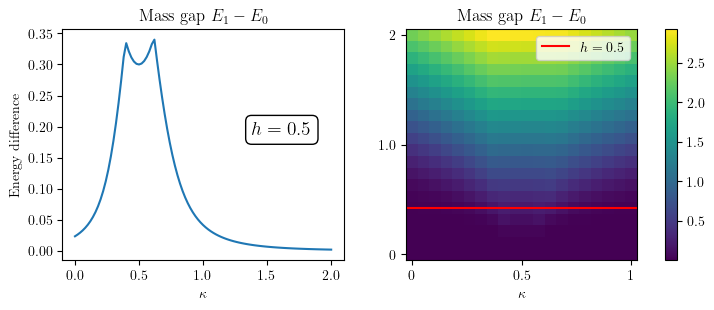

In [26]:
# "already in the spectrum you can check that there are differences"
fig, axs = plt.subplots(1, 2, figsize=(8, 3)); 
axs[0].set_title(r'Mass gap $E_1-E_0$')
axs[0].annotate(r'$h=0.5$', xy=(180, 100), xycoords='axes points', size=14, ha='right', va='top', bbox=dict(boxstyle='round', fc='w'))
axs[0].plot(np.abs(kappas), E1-E0); axs[0].set_ylabel('Energy difference'); axs[0].set_xlabel(r'$\kappa$')

im = axs[1].imshow(np.rot90(np.reshape(MS[0], (20,20))), cmap='viridis')
axs[1].set_xlabel(r'$\kappa$'); axs[1].set_xticks(ticks=[0,9.5,19], labels=[0,kappa_max/2, kappa_max])
axs[1].set_yticks([]); axes[i].set_title(rf'$E_{i+1}(\kappa,h)-E_{i}(\kappa,h)$'); axes[1].set_ylabel(r'$h$')
fig.colorbar(im,fraction=0.06, pad=0.1); axs[1].set_yticks(ticks=[19,9.5,0], labels=[0,h_max/2, h_max])
axs[1].set_title(r'Mass gap $E_1-E_0$'); axs[1].axhline(.75*20, color='red', label=r'$h=0.5$'); axs[1].legend()

Text(304.90287245468954, 0.5, '$h$')

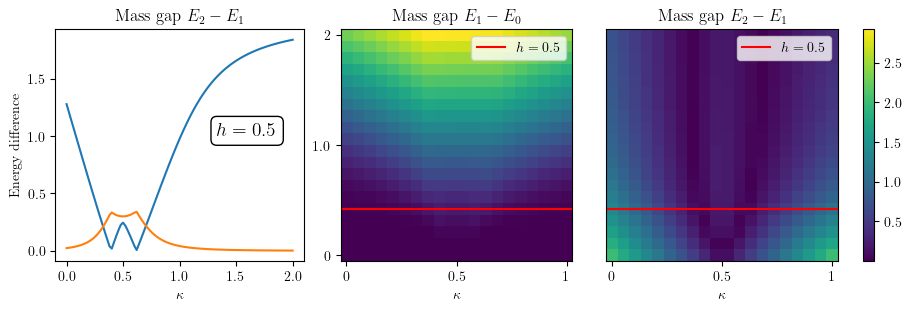

In [27]:
# Which is more prominent for the Mass Gap E2 - E1:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True); 
axs[0].set_title(r'Mass gap $E_2-E_1$')
axs[0].annotate(r'$h=0.5$', xy=(160, 100), xycoords='axes points', size=14, ha='right', va='top', bbox=dict(boxstyle='round', fc='w'))
axs[0].plot(np.abs(kappas), E2-E1, label=r'$E_1-E_0$')
axs[0].plot(np.abs(kappas), E1-E0, label=r'$E_2-E_1$')
axs[0].set_ylabel('Energy difference'); axs[0].set_xlabel(r'$\kappa$')

im = axs[1].imshow(np.rot90(np.reshape(MS[0], (20,20))), cmap='viridis', vmin=mg_immin, vmax=mg_immax)
axs[1].set_xlabel(r'$\kappa$'); axs[1].set_xticks(ticks=[0,9.5,19], labels=[0,kappa_max/2, kappa_max])
axs[1].set_yticks([]); axes[i].set_title(rf'$E_{i+1}(\kappa,h)-E_{i}(\kappa,h)$')
axs[1].set_title(r'Mass gap $E_1-E_0$'); axs[1].axhline(.75*20, color='red', label=r'$h=0.5$'); axs[1].legend()

im = axs[2].imshow(np.rot90(np.reshape(MS[1], (20,20))), cmap='viridis', vmin=mg_immin, vmax=mg_immax)
axs[2].set_xlabel(r'$\kappa$'); axs[2].set_xticks(ticks=[0,9.5,19], labels=[0,kappa_max/2, kappa_max])
axs[2].set_yticks([]); axes[i].set_title(rf'$E_{i+1}(\kappa,h)-E_{i}(\kappa,h)$')
axs[2].set_title(r'Mass gap $E_2-E_1$'); axs[2].axhline(.75*20, color='red', label=r'$h=0.5$'); axs[2].legend()

fig.colorbar(im,fraction=0.06, pad=0.1); axs[1].set_yticks(ticks=[19,9.5,0], labels=[0,h_max/2, h_max])
axes[1].set_ylabel(r'$h$')

In [28]:
# "for kappa = 0 , the lowest two eigenvalues are almost degenerate"
# "for kappa = 0.5, the lowest eigenvalue is really unique   <sz> > 0.7  <sx> = 0"
# "for kappa = 0.8 the lowest eigenvalue is also unique   <sz> < 0.5   <sx> = 0 [in the thermodynamical limit, we expect  <sz> = <sx> = 0]""
# "for kappa = 1.5 the lowest four eigenvalues are almost degenerate"

In [57]:
def pauli_expvalZ(psi, pauli = 'Z'):
    n_qubits = int(jax.numpy.log2(len(psi)))
    if pauli == 'Z':
        S = jax.numpy.array([[1, 0], [0, -1]])
    elif pauli == 'X':
        S = jax.numpy.array([[0, 1], [1,  0]])
    else:
        raise ValueError('Unsupported Pauli')
        
    ID = jax.numpy.array([[1,0], [0,1]])

    expvals = []
    for qubit in range(n_qubits):
        if qubit == 0:
            full_matrix = copy.copy(S)
        else:
            full_matrix = copy.copy(ID)

        for qubit2 in range(1,n_qubits):
            if qubit2 == qubit:
                full_matrix = jax.numpy.kron(full_matrix, S )
            else:
                full_matrix = jax.numpy.kron(full_matrix, ID)

        expval = jax.numpy.einsum('ab,a,b', full_matrix, psi, jax.numpy.conj(psi))
        expvals.append(expval)

    return jax.numpy.mean(jax.numpy.array(expvals))

v_pauliZ = jax.vmap(pauli_expvalZ, (0,None))

Text(0.5, 1.0, 'First 4 Energy Levels at $h=0.5$')

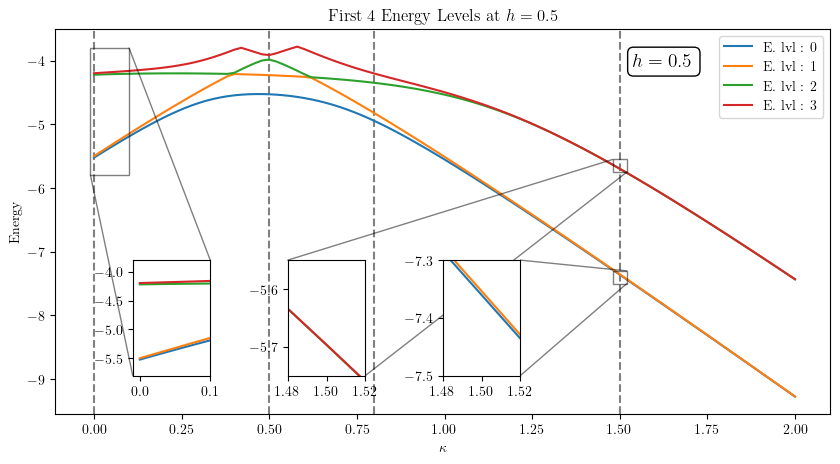

In [29]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

ax.axvline(x=0.0, ls='--', color='gray'); ax.axvline(x=0.5, ls='--', color='gray'); ax.axvline(x=0.8, ls='--', color='gray'); ax.axvline(x=1.5, ls='--', color='gray')
ax.plot(np.abs(kappas), E0, label = f'E. lvl : {0}'); ax.plot(np.abs(kappas), E1, label = f'E. lvl : {1}')
ax.plot(np.abs(kappas), E2, label = f'E. lvl : {2}'); ax.plot(np.abs(kappas), E3, label = f'E. lvl : {3}')

inset = ax.inset_axes(bounds=[0.1, 0.1, 0.1, 0.3])
inset.set_xlim([-0.01,0.1]); inset.set_ylim([-5.8,-3.8])
ax.indicate_inset_zoom(inset, edgecolor="black", zorder=5)
inset.plot(np.abs(kappas), E0); inset.plot(np.abs(kappas), E1)
inset.plot(np.abs(kappas), E2); inset.plot(np.abs(kappas), E3)

inset1 = ax.inset_axes(bounds=[0.3, 0.1, 0.1, 0.3])
inset1.set_xlim([1.48,1.52]); inset1.set_ylim([-5.75,-5.55])
ax.indicate_inset_zoom(inset1, edgecolor="black", zorder=5)
inset1.plot(np.abs(kappas), E0); inset1.plot(np.abs(kappas), E1)
inset1.plot(np.abs(kappas), E2); inset1.plot(np.abs(kappas), E3)

inset2 = ax.inset_axes(bounds=[0.5, 0.1, 0.1, 0.3])
inset2.set_xlim([1.48,1.52]); inset2.set_ylim([-7.5,-7.3])
ax.indicate_inset_zoom(inset2, edgecolor="black", zorder=5)
inset2.plot(np.abs(kappas), E0); inset2.plot(np.abs(kappas), E1); inset2.plot(np.abs(kappas), E2); inset2.plot(np.abs(kappas), E3)

ax.set_xlabel(r'$\kappa$'); ax.set_ylabel('Energy')
ax.annotate(r'$h=0.5$', xy=(460, 260), xycoords='axes points', size=14, ha='right', va='top', bbox=dict(boxstyle='round', fc='w'))
ax.legend(); ax.set_title(r'First 4 Energy Levels at $h=0.5$')

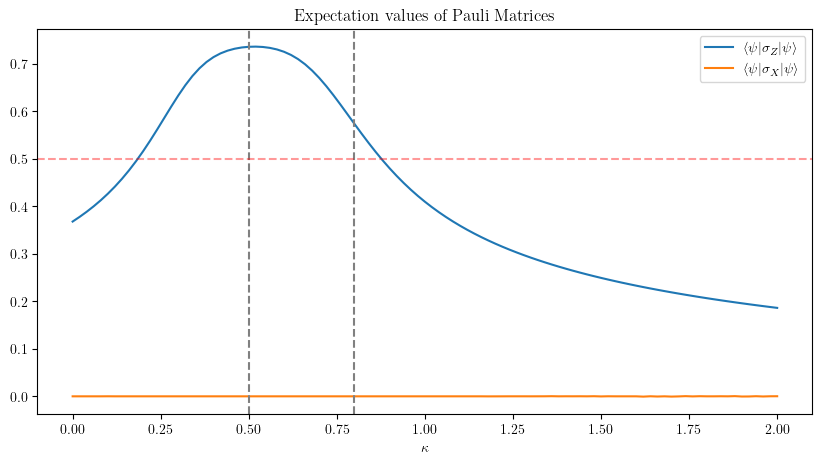

In [60]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(kappas), v_pauliZ(PSI0, 'Z'), label=r'$\langle \psi |\sigma_Z|\psi\rangle$'); plt.plot(np.abs(kappas), v_pauliZ(PSI0, 'X'), label=r'$\langle \psi |\sigma_X|\psi\rangle$')
plt.title('Expectation values of Pauli Matrices'); plt.xlabel(r'$\kappa$'); plt.legend(); plt.axvline(x=0.5,ls='--', color='gray'); plt.axvline(x=0.8,ls='--', color='gray'); plt.axhline(y=0.5, ls='--', color='red', alpha=0.4)

#### Regarding the figures above:
- _"for $\kappa = 0$ , the lowest two eigenvalues are almost degenerate"_
    * Yes, even the 3rd and 4th lowest eigenvalues are degenerate to each other
$$ $$
- _"for $\kappa = 0.5$, the lowest eigenvalue is really unique   $\langle sz\rangle > 0.7\quad \langle sx\rangle  = 0$"_
    * All the eigenvalues can be discriminated, there is no big degeneracy
$$ $$
- _"for $\kappa = 0.8$ the lowest eigenvalue is also unique $\langle sz\rangle < 0.5\quad \langle sx\rangle = 0$ [in the thermodynamical limit, we expect  $\langle sz\rangle = \langle sx\rangle = 0$]"_
    * Yes, however we are approaching degeneracy (by increasing $\kappa$ a bit more)
$$ $$
- _"for $\kappa = 1.5$ the lowest four eigenvalues are almost degenerate"_
    * Yes, similar situation of $\kappa=0$

### How does $\langle \sigma_Z \rangle$ change approaching* the thermodynamical limit?

In [ ]:
def pauli_expvalZ(psi, n_qubits):
    S = jax.numpy.array([[1, 0], [0, -1]])
    ID = jax.numpy.array([[1,0], [0,1]])

    expvals = []
    for qubit in range(n_qubits):
        if qubit == 0:
            full_matrix = copy.copy(S)
        else:
            full_matrix = copy.copy(ID)

        for qubit2 in range(1,n_qubits):
            if qubit2 == qubit:
                full_matrix = jax.numpy.kron(full_matrix, S )
            else:
                full_matrix = jax.numpy.kron(full_matrix, ID)

        expval = jax.numpy.einsum('ab,a,b', full_matrix, psi, jax.numpy.conj(psi))
        expvals.append(expval)

    return jax.numpy.mean(jax.numpy.array(expvals))

v_pauliZ1 = jax.vmap(pauli_expvalZ, (0,None))

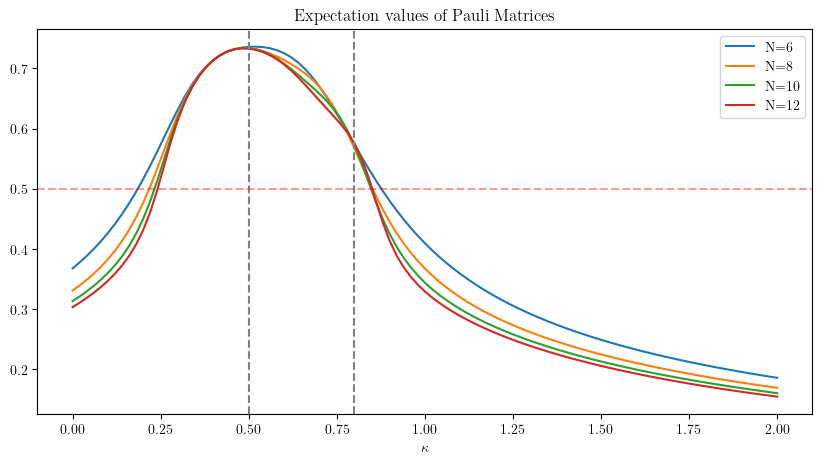

In [54]:
Ns = [6,8,10,12]

plt.figure(figsize=(10,5))
for n in Ns:
    jv_pauliZ = jax.jit(lambda psi : v_pauliZ1(psi, n))
    PSI0_n = []
    Hs_n = H.hamiltonian(ANNNI.build_Hs, N = n, n_hs = 2, n_kappas = 101, kappa_max=2, h_max = .5, ring = False)
    kappas_n = Hs_n.model_params[1::2][:,2]
    Hmats_n  = Hs_n.qml_Hs[1::2]
    for Hmat_n in Hmats_n:
        PSI0_n.append(qmlgen.get_H_eigval_eigvec(Hmat_n, 0)[2])
    PSI0_n = np.array(PSI0_n)
    plt.plot(np.abs(kappas), jv_pauliZ(PSI0_n), label=f'N={n}')
plt.title('Expectation values of Pauli Matrices'); plt.xlabel(r'$\kappa$'); plt.legend(); plt.axvline(x=0.5,ls='--', color='gray'); plt.axvline(x=0.8,ls='--', color='gray'); plt.axhline(y=0.5, ls='--', color='red', alpha=0.4)